In [11]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from prg import prg
np.random.seed(7)

from keras.models import load_model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, roc_auc_score, precision_recall_curve, auc, roc_curve
from sklearn.preprocessing import StandardScaler

from retreive_data import unpack_gzip

import keras.backend as K

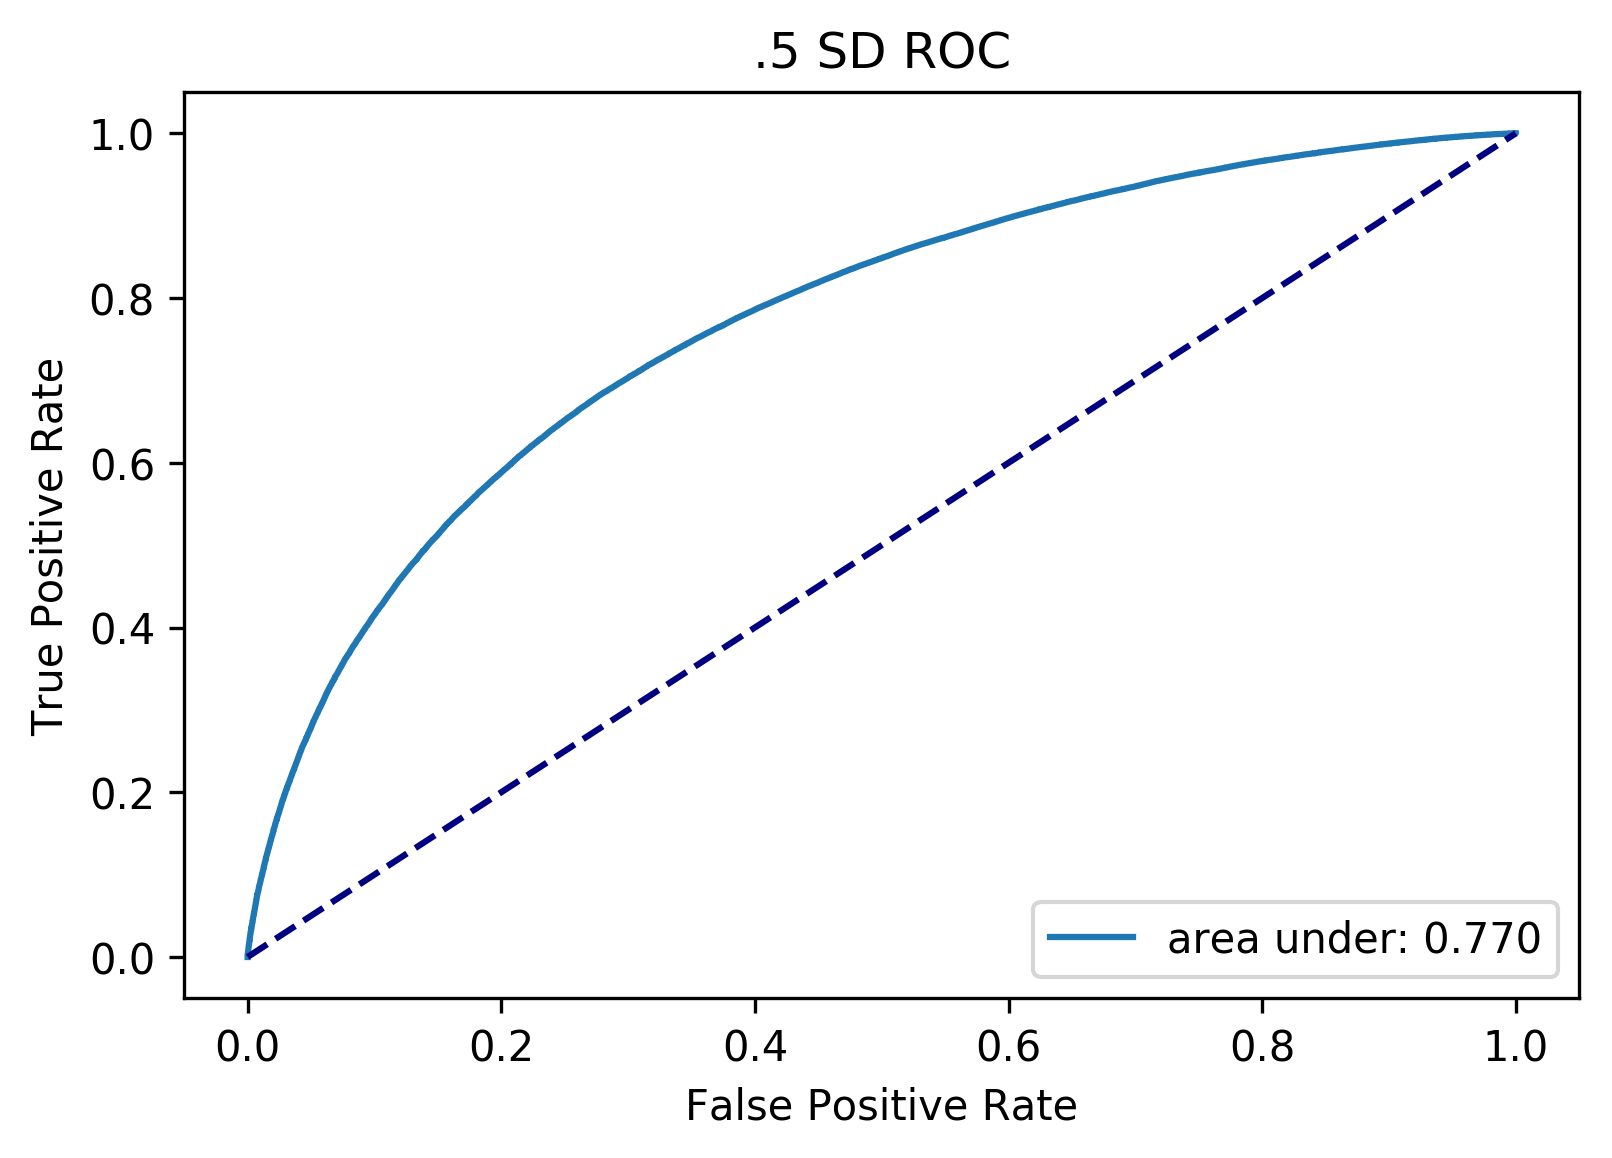

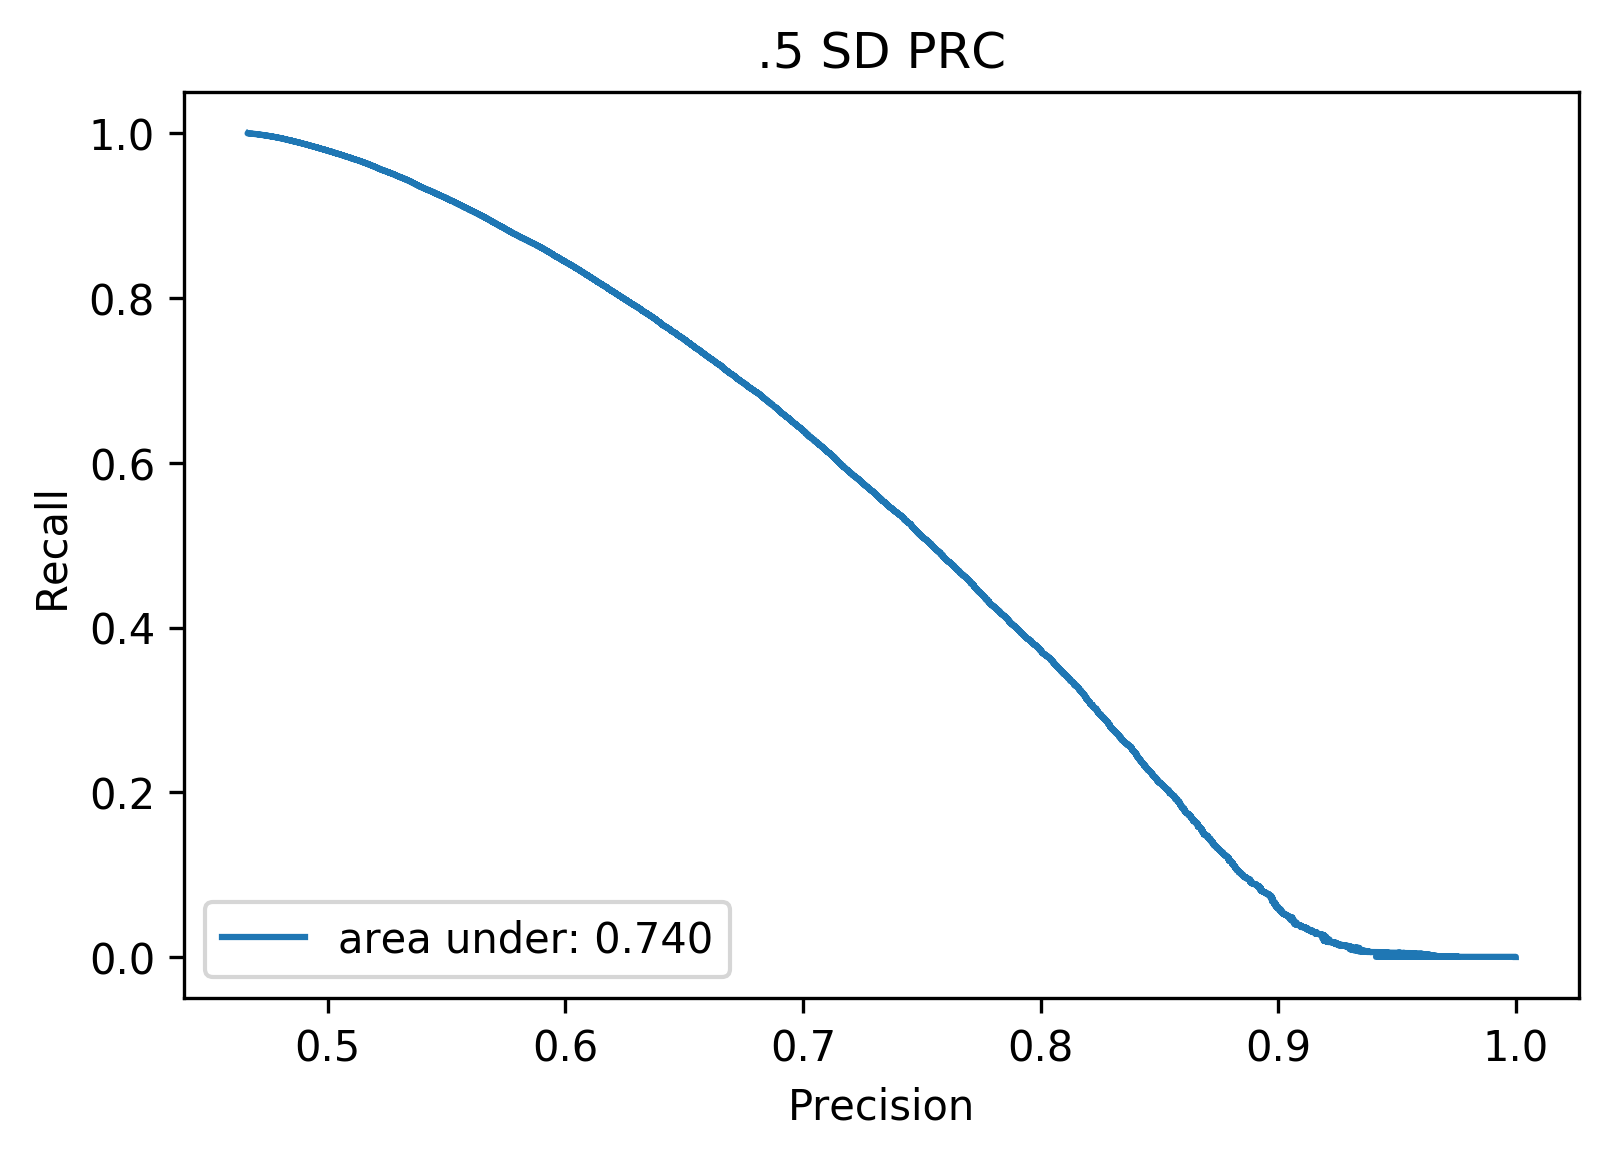

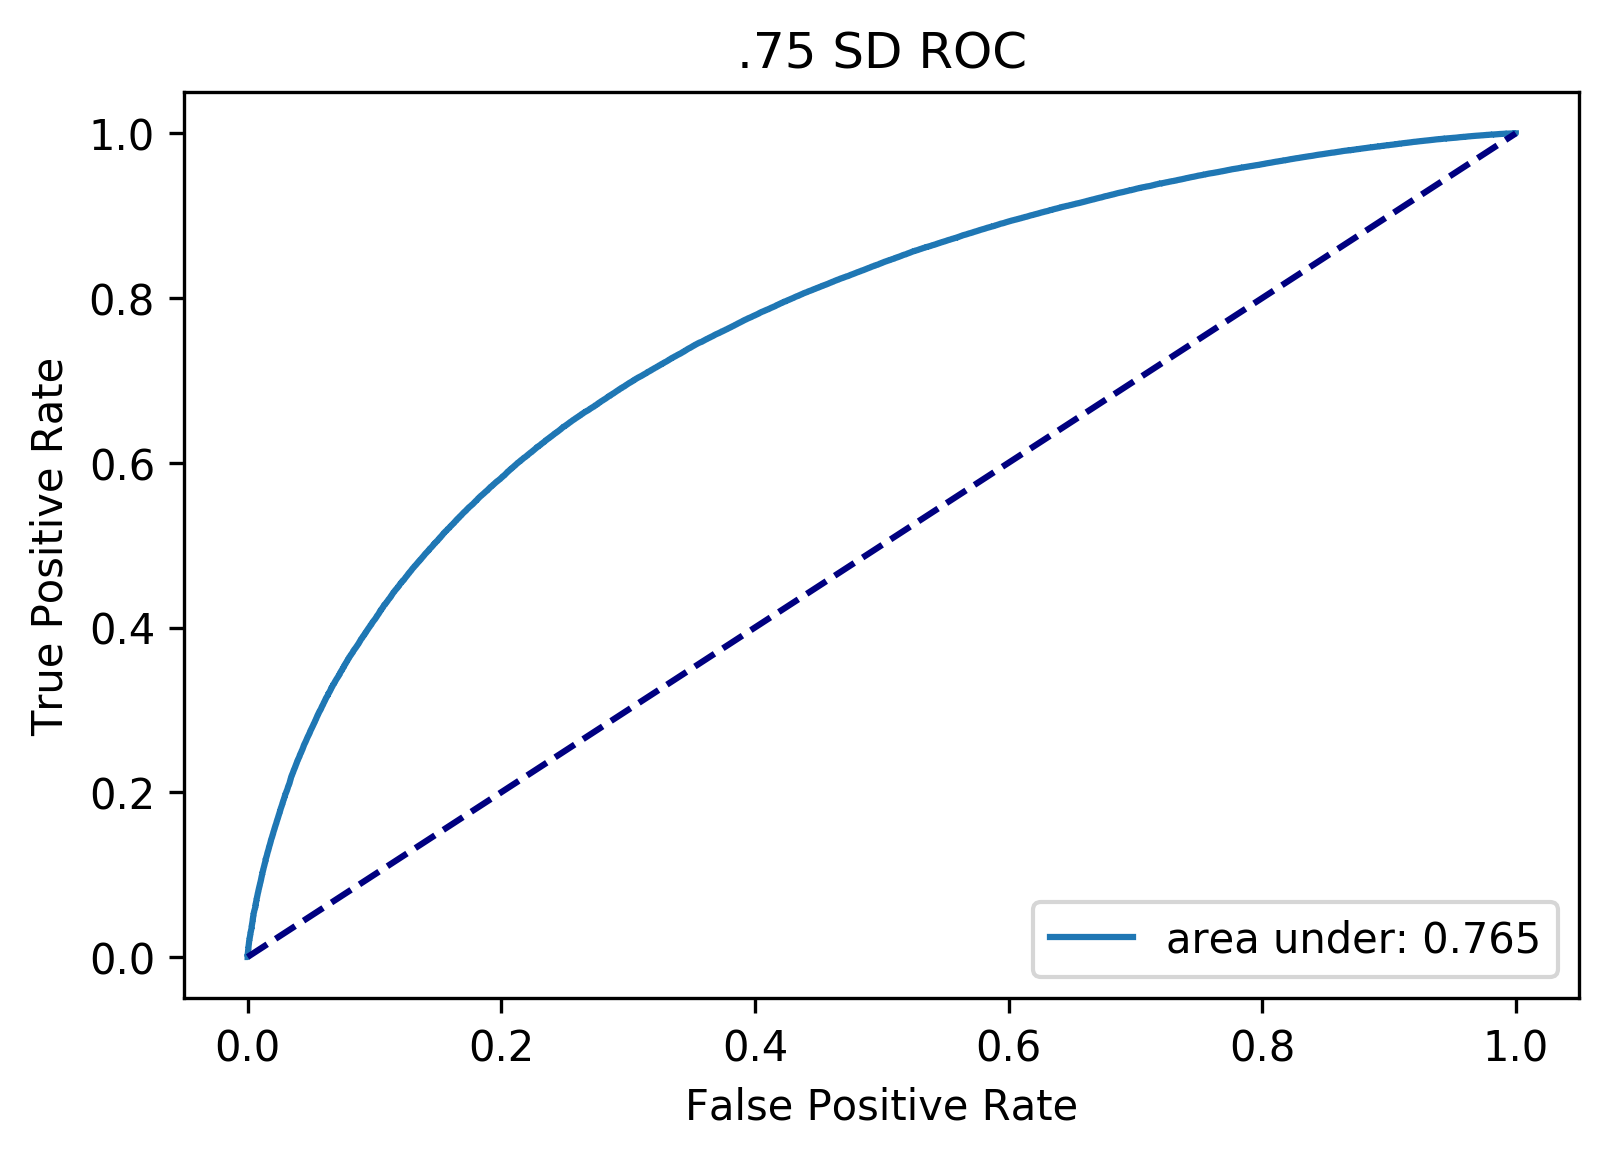

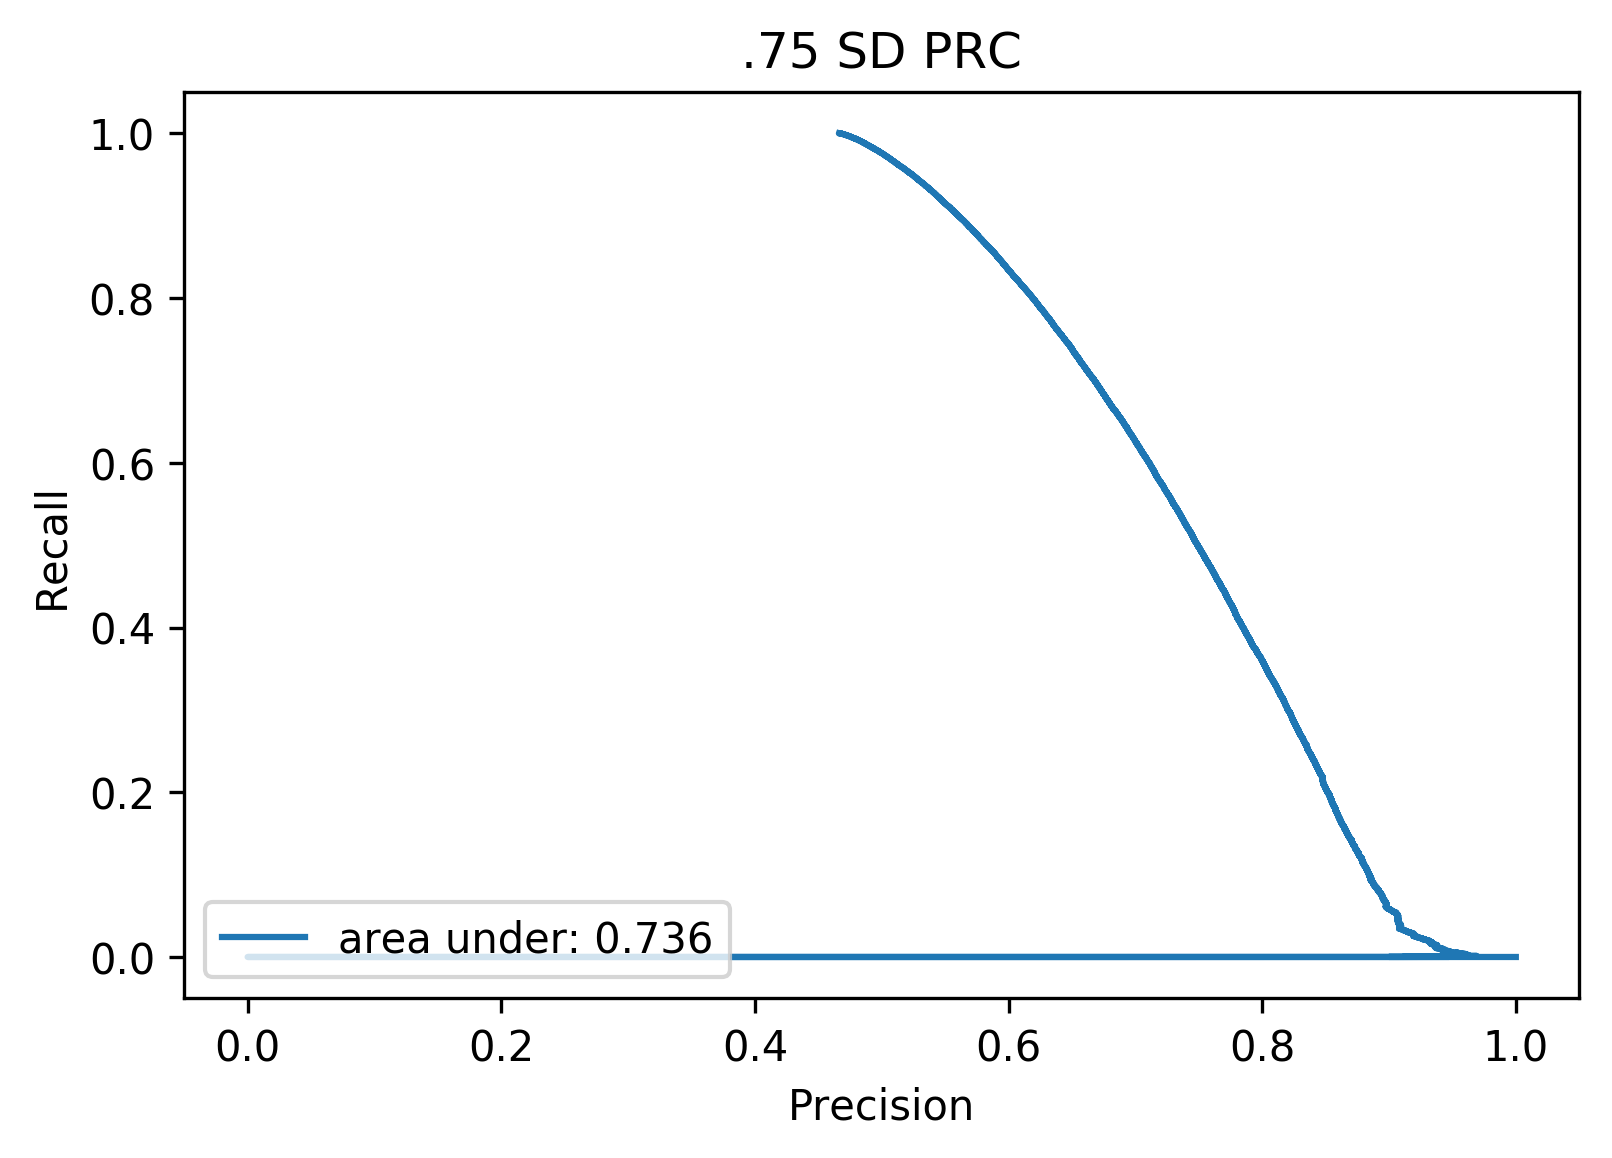

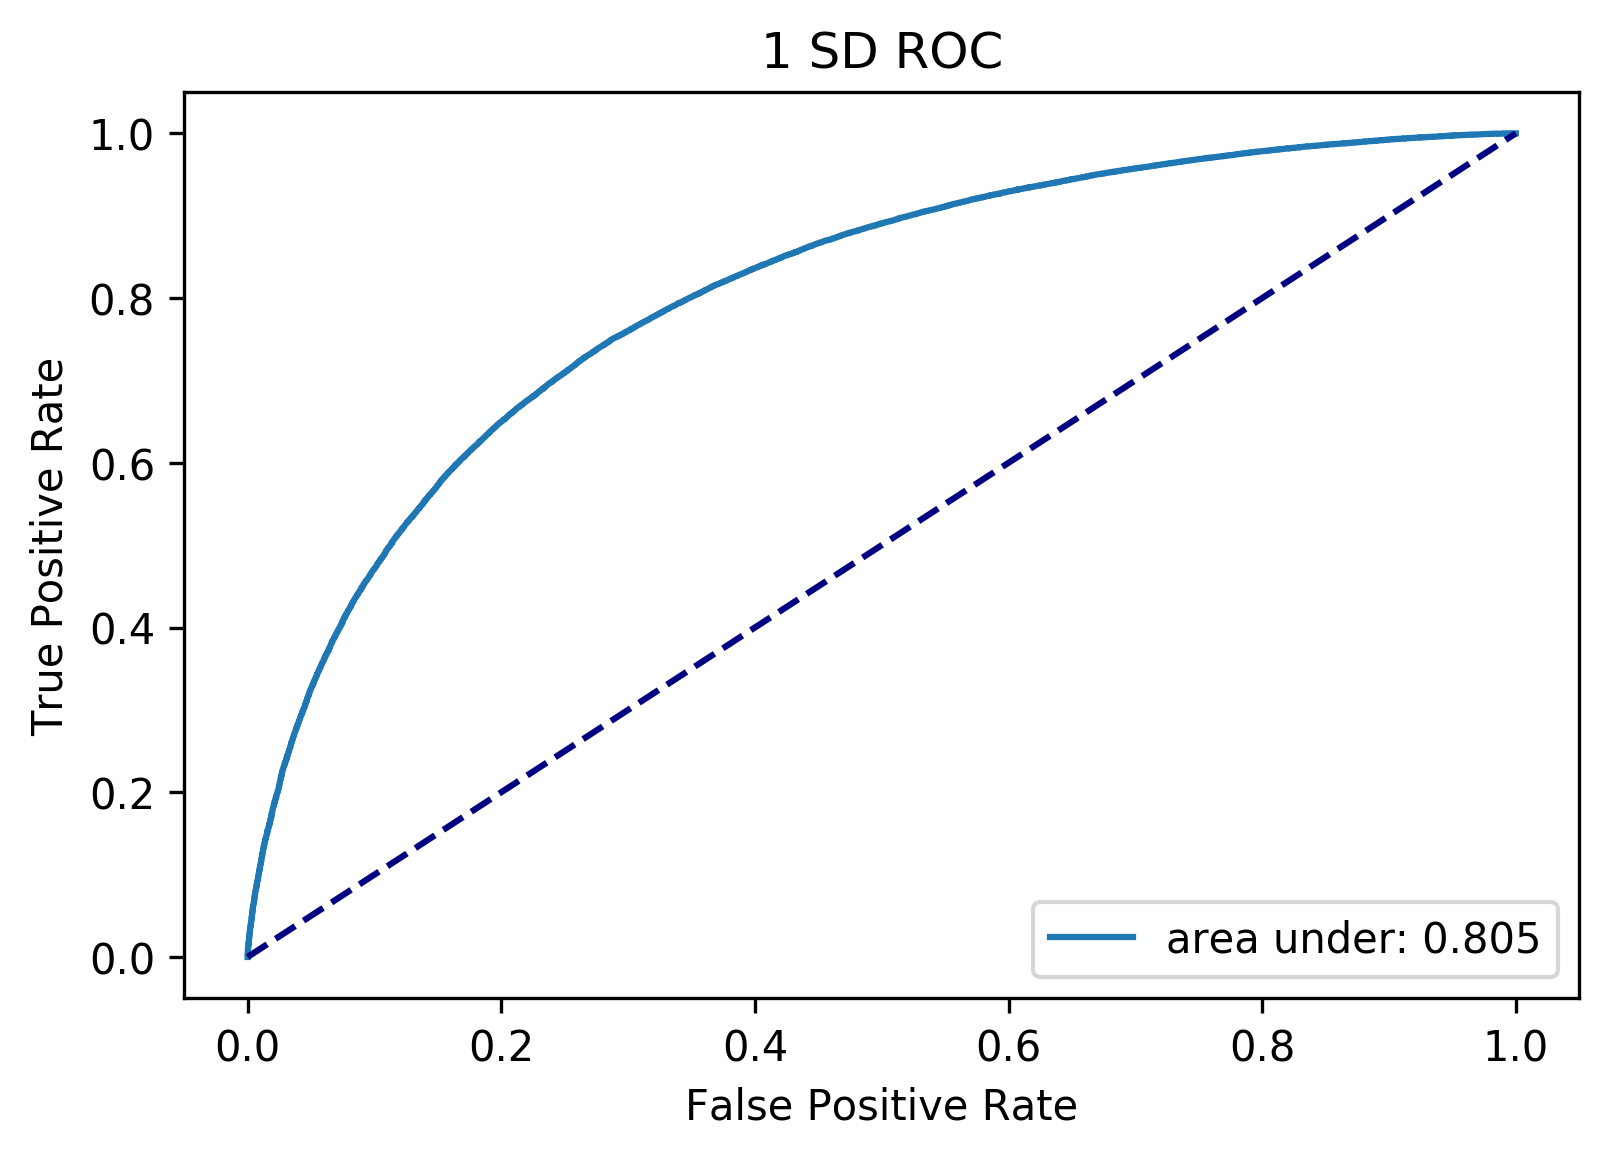

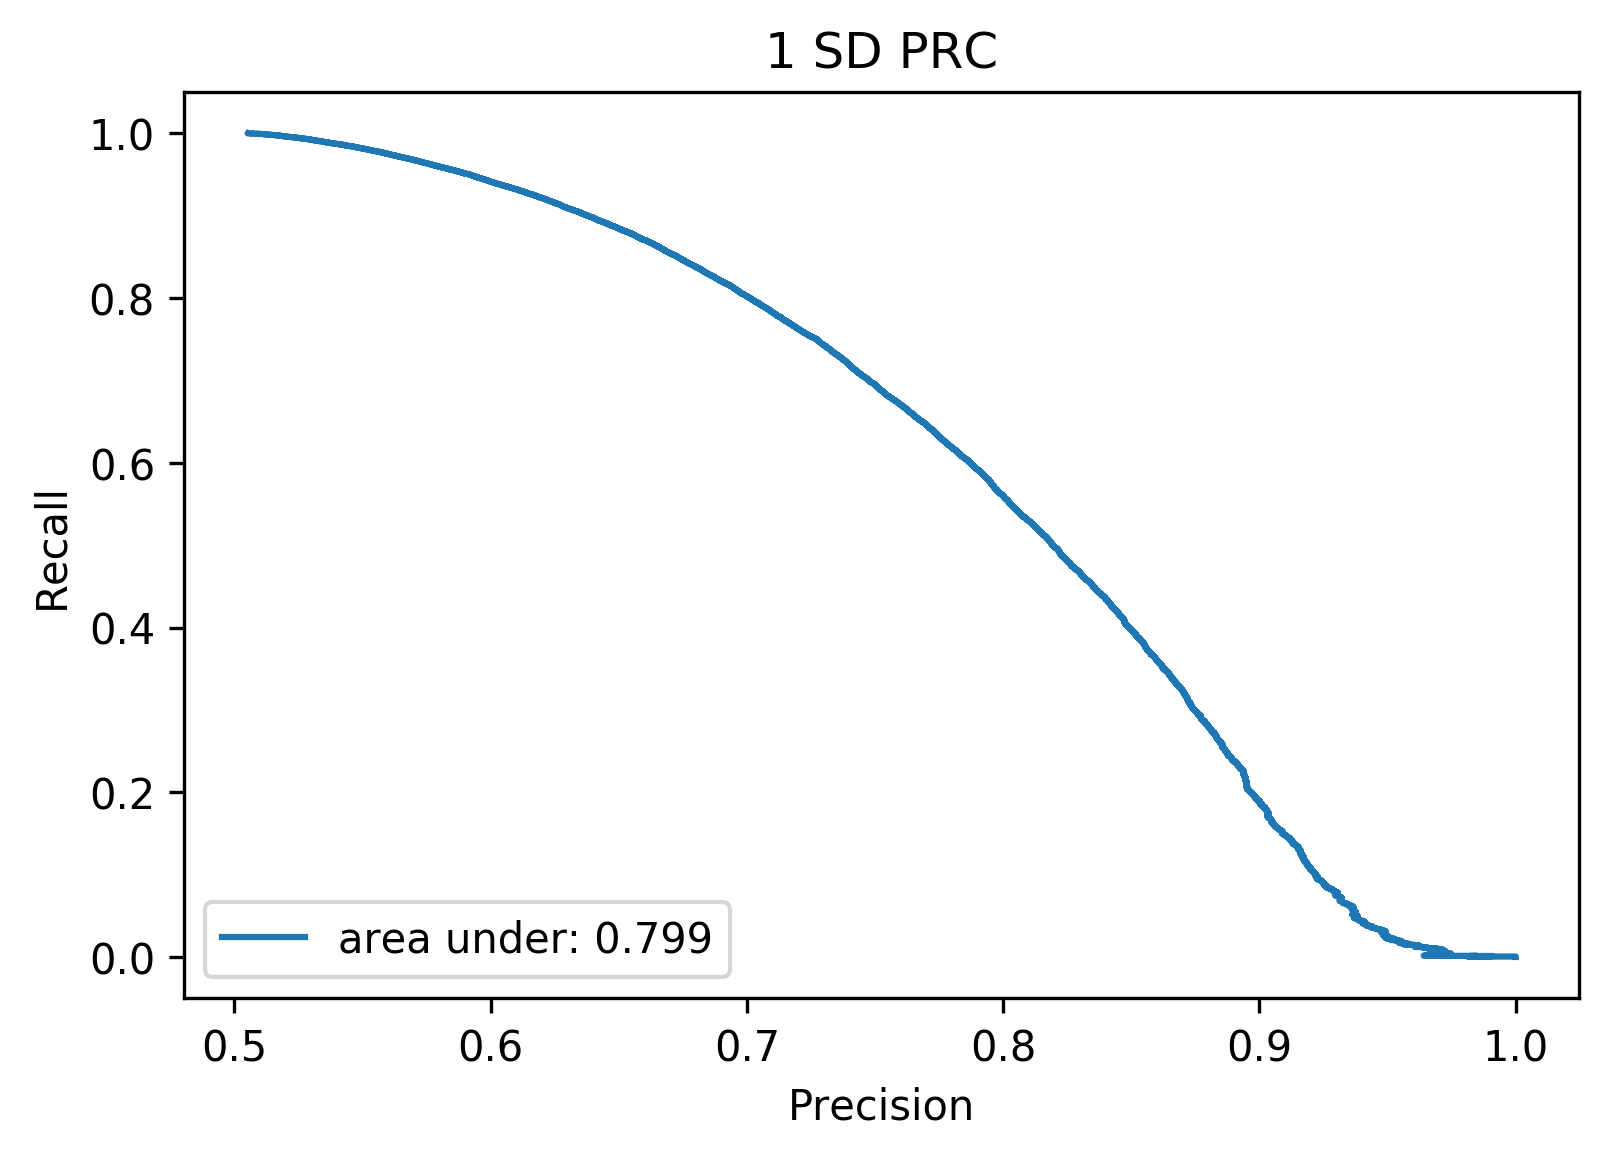

In [9]:
for data_ver in [("std5", ".5 SD"), ("std75", ".75 SD"), ("std1", "1 SD")]:
    y_real = []
    y_pred = []
    chrm_res_dict = np.load(data_ver[0] + "res.npy").item()
    for i in range(1, 23):
        y_real = y_real + list(chrm_res_dict["chr" + str(i)][0])
        y_pred = y_pred + list(chrm_res_dict["chr" + str(i)][1])
    #print "roc score:", roc_auc_score(y_real, y_pred)
    precision, recall = precision_recall_curve(y_real, y_pred)[:2]
    #print "auprc:", auc(recall, precision)

    fpr, tpr, _ = roc_curve(y_real, y_pred)
    auroc = auc(fpr, tpr)

    plt.figure(dpi=300)
    plt.plot(fpr, tpr, label="area under: %0.3f" % auroc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title(data_ver[1] + " ROC", fontname="Times")
    plt.show()

    plt.figure(dpi=300)
    plt.plot(precision, recall, label="area under: %0.3f" % auc(recall, precision))
    plt.legend(loc="lower left")
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title(data_ver[1] + " PRC")
    plt.show()

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

model = load_model("best_model_std752.hdf5")
SVG(model_to_dot(model).create(prog='dot', format='svg'))

from keras.utils import plot_model
plot_model(model, to_file='model75.png', show_shapes=True)